In [1]:
import matplotlib.pyplot as plt
import numpy as np
import edl
import plotting
import constants as C

%matplotlib widget

In [2]:
model1 = edl.ProtonLPB(1e-1, 0, 0, 0, 0)
model2 = edl.ProtonLPB(1e-1, 1, 1, 1, 1)
model3 = edl.ProtonLPB(1e-1, 7, 1, 1, 1)
model1b = edl.ProtonLPB(1e-1, 0, 0, 0, 0, eps_r_opt=C.EPS_R_WATER)
model2b = edl.ProtonLPB(1e-1, 1, 1, 1, 1, eps_r_opt=C.EPS_R_WATER)
model3b = edl.ProtonLPB(1e-1, 7, 1, 1, 1, eps_r_opt=C.EPS_R_WATER)
ins_sol1 = model2.insulator_spatial_profiles(p_h=13.01, tol=1e-2)
ins_sol2 = model3.insulator_spatial_profiles(p_h=13.01, tol=1e-2)

Sweep from pH 2.00 to 13.00. Maximum relative residual: 2.04973e-05.
Sweep from pH 2.00 to 13.00. Maximum relative residual: 1.92707e-05.


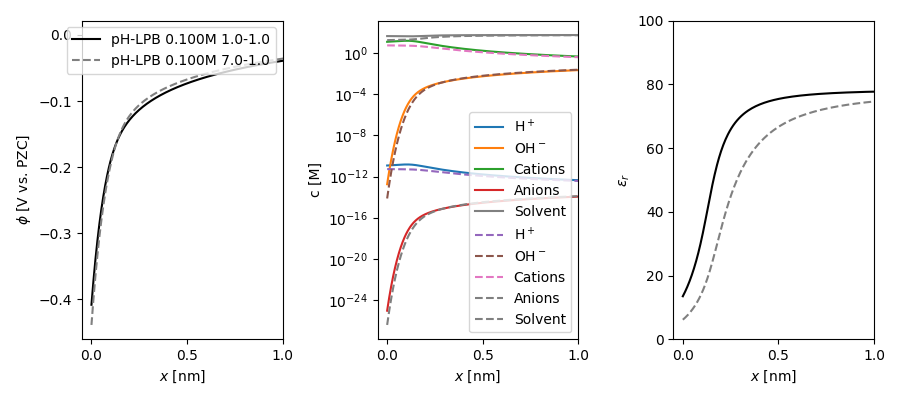

In [3]:
xmin = -0.05
xmax = 1

# fig, ax = plotting.plot_solution(ins_sol, xmin, xmax, logscale=False)
fig, ax = plotting.plot_sol_comparison(ins_sol1, ins_sol2, xmin=xmin, xmax=xmax, logscale=True)
plt.show()

In [4]:
p_h = np.linspace(1, 13, 700)
sweep_sol1 = model1.ph_sweep(p_h, tol=1e-2)
sweep_sol2 = model2.ph_sweep(p_h, tol=1e-2)
sweep_sol3 = model3.ph_sweep(p_h, tol=1e-2)
sweep_sol1b = model1b.ph_sweep(p_h, tol=1e-2)
sweep_sol2b = model2b.ph_sweep(p_h, tol=1e-2)
sweep_sol3b = model3b.ph_sweep(p_h, tol=1e-2)

Sweep from pH 2.00 to 1.00. Maximum relative residual: 1.85214e-10.
Sweep from pH 2.00 to 13.00. Maximum relative residual: 7.79743e-05.
Sweep from pH 2.00 to 1.00. Maximum relative residual: 1.71528e-10.
Sweep from pH 2.00 to 13.00. Maximum relative residual: 2.14308e-05.
Sweep from pH 2.00 to 1.00. Maximum relative residual: 2.08896e-10.
Sweep from pH 2.00 to 13.00. Maximum relative residual: 1.53904e-05.
Sweep from pH 2.00 to 1.00. Maximum relative residual: 9.65285e-11.
Sweep from pH 2.00 to 13.00. Maximum relative residual: 6.42041e-05.
Sweep from pH 2.00 to 1.00. Maximum relative residual: 9.54012e-11.
Sweep from pH 2.00 to 13.00. Maximum relative residual: 1.43658e-05.
Sweep from pH 2.00 to 1.00. Maximum relative residual: 9.53617e-11.
Sweep from pH 2.00 to 13.00. Maximum relative residual: 2.41604e-06.


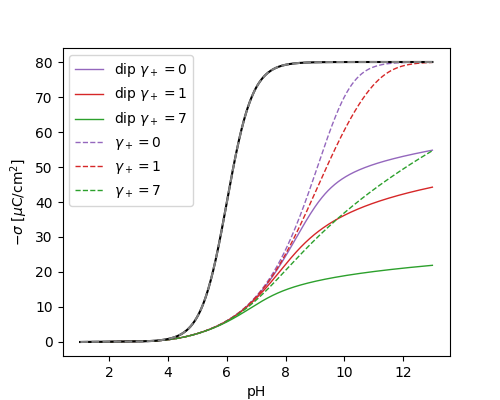

In [5]:
plt.close()
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(p_h, -sweep_sol1.charge * 1e2, color='tab:purple', label=rf'dip $\gamma_+=0$', linewidth=1)
ax.plot(p_h, -sweep_sol2.charge * 1e2, color='tab:red', label=f'dip $\gamma_+=1$', linewidth=1)
ax.plot(p_h, -sweep_sol3.charge * 1e2, color='tab:green', label=f'dip $\gamma_+=7$', linewidth=1)
ax.plot(p_h, -sweep_sol1b.charge * 1e2, '--', color='tab:purple', label=f'$\gamma_+=0$', linewidth=1)
ax.plot(p_h, -sweep_sol2b.charge * 1e2, '--', color='tab:red', label=f'$\gamma_+=1$', linewidth=1)
ax.plot(p_h, -sweep_sol3b.charge * 1e2, '--', color='tab:green', label=f'$\gamma_+=7$', linewidth=1)

c_h = 10 ** (-p_h)
sigma = C.E_0 * C.N_SITES_SILICA \
            * (c_h**2 - C.K_SILICA_A * C.K_SILICA_B) \
            / (C.K_SILICA_A * C.K_SILICA_B + C.K_SILICA_B * c_h + c_h**2)
ax.plot(p_h, -sigma * 1e2, color='black')

p_oh = np.linspace(1, 13, 100)
c_oh = 10 ** (-p_oh)
sigma2 = - C.E_0 * C.N_SITES_SILICA \
            * (c_oh**2 - C.K_WATER ** 2 / (C.K_SILICA_A * C.K_SILICA_B)) \
            / (C.K_WATER ** 2 / (C.K_SILICA_A * C.K_SILICA_B) + C.K_WATER/C.K_SILICA_A * c_oh + c_oh**2)
ax.plot(14 - p_oh, -sigma2 * 1e2, '--', color='gray')

ax.set_ylabel(r'$-\sigma$ [$\mu$C/cm$^2$]')
ax.set_xlabel('pH')

ax.legend()

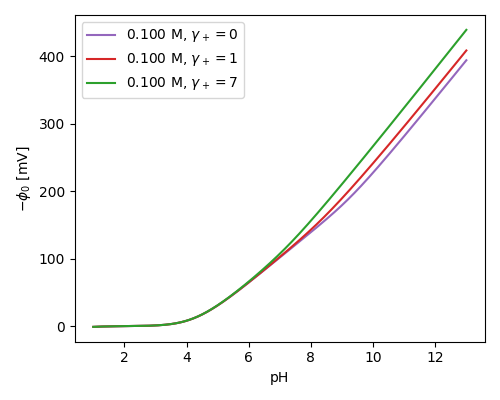

In [6]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(p_h, -sweep_sol1.phi * 1e3, color='tab:purple', label=rf'{1e-1:.3f} M, $\gamma_+=0$')
ax.plot(p_h, -sweep_sol2.phi * 1e3, color='tab:red', label=rf'{1e-1:.3f} M, $\gamma_+=1$')
ax.plot(p_h, -sweep_sol3.phi * 1e3, color='tab:green', label=rf'{1e-1:.3f} M, $\gamma_+=7$')

# ax.set_ylim([-5, 100])
# ax.set_xlim([1, 5])
ax.set_ylabel(r'$-\phi_0$ [mV]')
ax.set_xlabel('pH')
ax.legend()
plt.tight_layout()

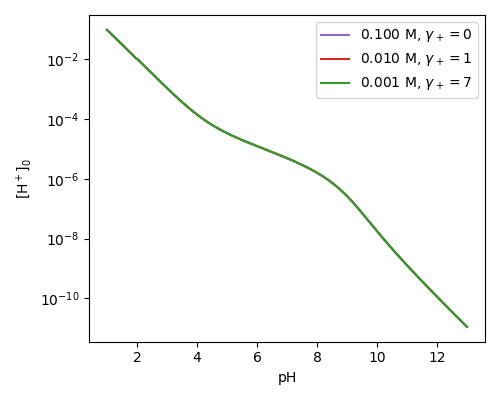

In [7]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(p_h, [sweep_sol1.profiles[i].c_dict[r'H$^+$'][0] for i, p in enumerate(p_h)], color='tab:purple', label=rf'{1e-1:.3f} M, $\gamma_+=0$')
ax.plot(p_h, [sweep_sol1.profiles[i].c_dict[r'H$^+$'][0] for i, p in enumerate(p_h)], color='tab:red', label=rf'{1e-2:.3f} M, $\gamma_+=1$')
ax.plot(p_h, [sweep_sol1.profiles[i].c_dict[r'H$^+$'][0] for i, p in enumerate(p_h)], color='tab:green', label=rf'{1e-3:.3f} M, $\gamma_+=7$')

ax.set_ylabel(r'[H$^+]_0$') 
ax.set_xlabel('pH')
ax.set_yscale('log')
ax.legend()
plt.tight_layout()